In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Load the dataset
df = pd.read_csv('Unemployment in India.csv') # remove the path from the filename since the file is in the same directory as the notebook

In [22]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [23]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [25]:
# Check for missing values
df.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [26]:
# Remove rows with missing values from df
df.dropna(inplace=True)

In [27]:
df.duplicated().sum()

0

In [28]:
# Renaming columns to remove any leading/trailing whitespaces
df.columns = df.columns.str.strip()

In [29]:
# Convert 'Date' columns to datetime format and remove any extra spaces
df['Date'] = pd.to_datetime(df['Date'].str.strip(), dayfirst=True)

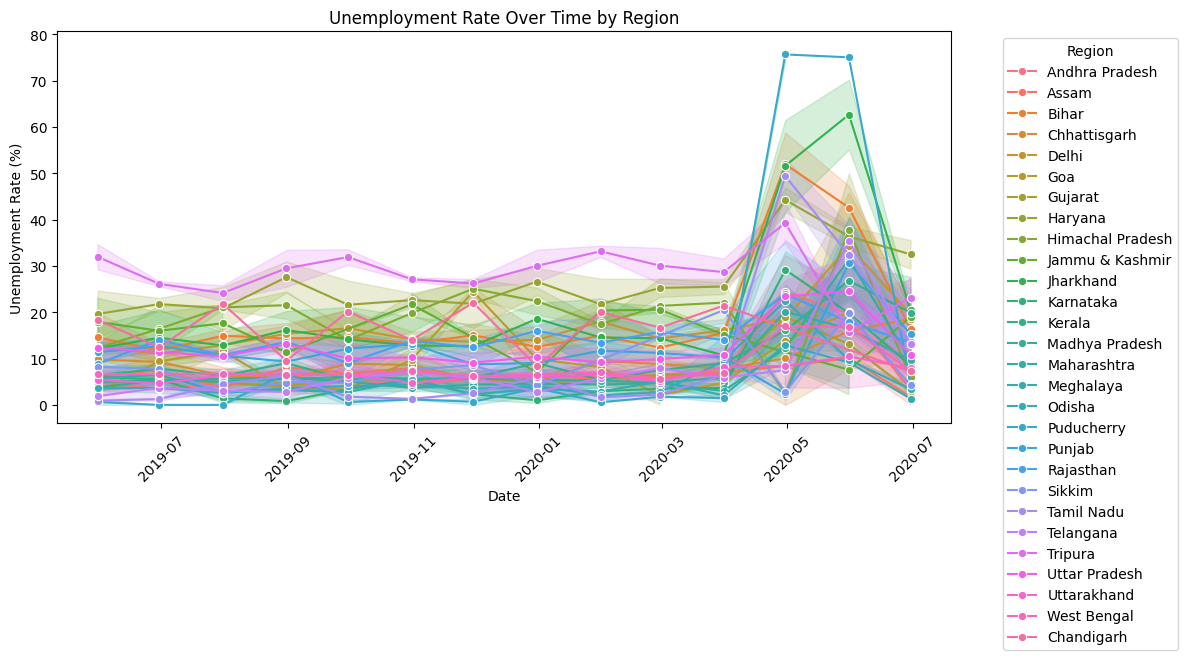

In [30]:
# Unemployment Rate Over Time for All Regions
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Region', marker='o')
plt.title('Unemployment Rate Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

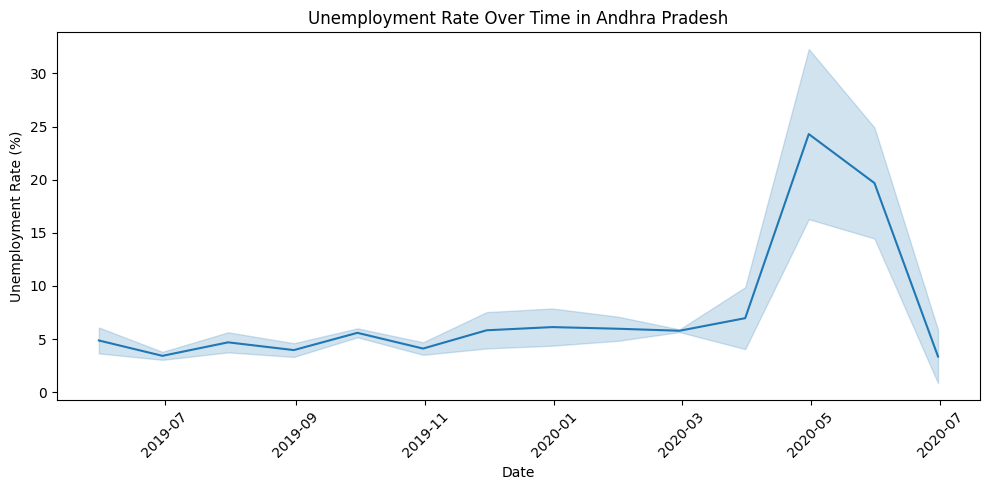

In [31]:
# Unemployment Rate Over Time for Andhra Pradesh
ap_data = df[df['Region'] == 'Andhra Pradesh']
plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=ap_data)
plt.title('Unemployment Rate Over Time in Andhra Pradesh')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

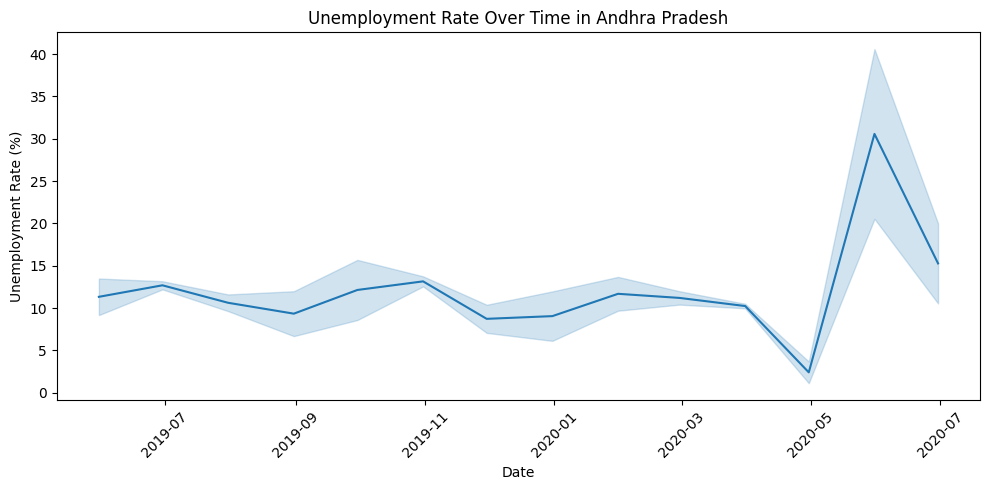

In [32]:
# Unemployment Rate Over Time for Andhra Pradesh
ap_data = df[df['Region'] == 'Punjab']
plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=ap_data)
plt.title('Unemployment Rate Over Time in Andhra Pradesh')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

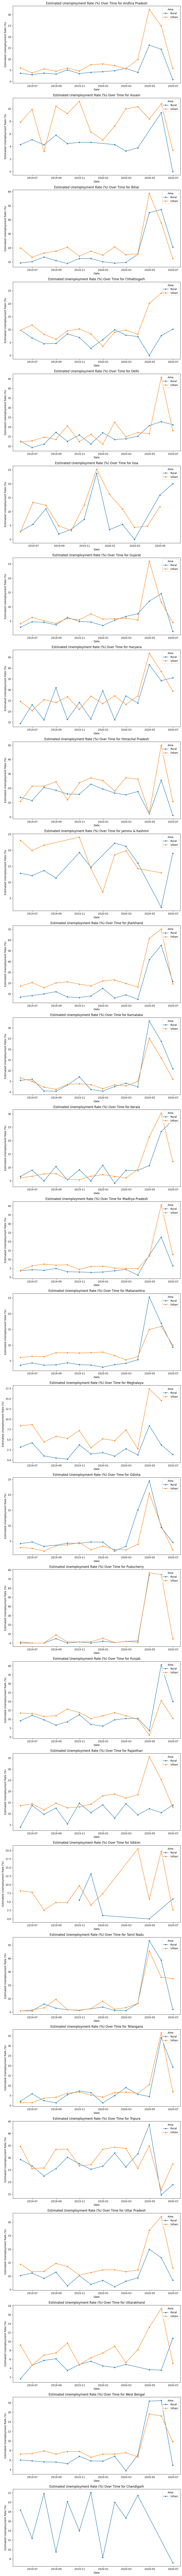

In [33]:
# Get the unique states from the dataset
states = df['Region'].unique()

# Plotting for each state
num_states = len(states)
fig, axes = plt.subplots(nrows=num_states, ncols=1, figsize=(10, 5 * num_states))

# Plotting for each state
for i, state in enumerate(states):
    state_data = df[df['Region'] == state]

    sns.lineplot(
        data=state_data,
        x='Date',
        y='Estimated Unemployment Rate (%)',
        hue='Area',
        marker='o',
        ax=axes[i]
    )

    axes[i].set_title(f'Estimated Unemployment Rate (%) Over Time for {state}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Estimated Unemployment Rate (%)')
    axes[i].legend(title='Area', loc='upper right')

plt.tight_layout()
plt.show()

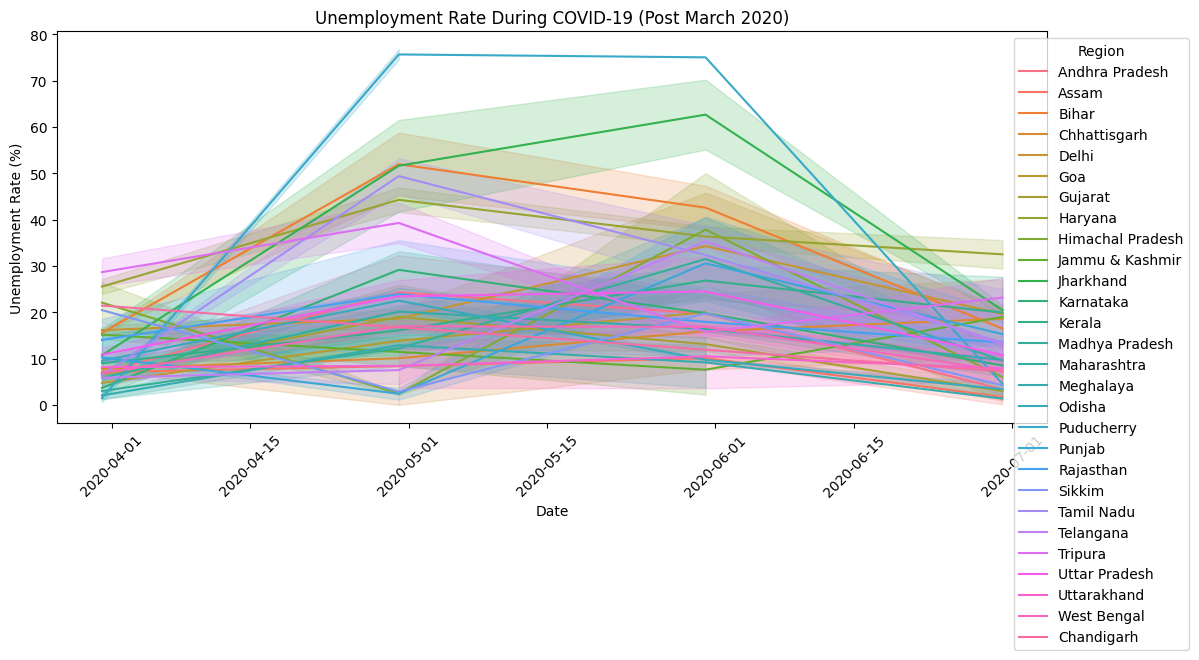

In [34]:
# Trend Analysis
# Analyzing the unemployment trend before and after COVID-19 lockdown (March 2020 onwards)
covid_period = df[df['Date'] >= '2020-03-01']

plt.figure(figsize=(12, 6))
sns.lineplot(data=covid_period, x='Date', y='Estimated Unemployment Rate (%)', hue='Region')
plt.title('Unemployment Rate During COVID-19 (Post March 2020)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend(loc='upper right', title='Region', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

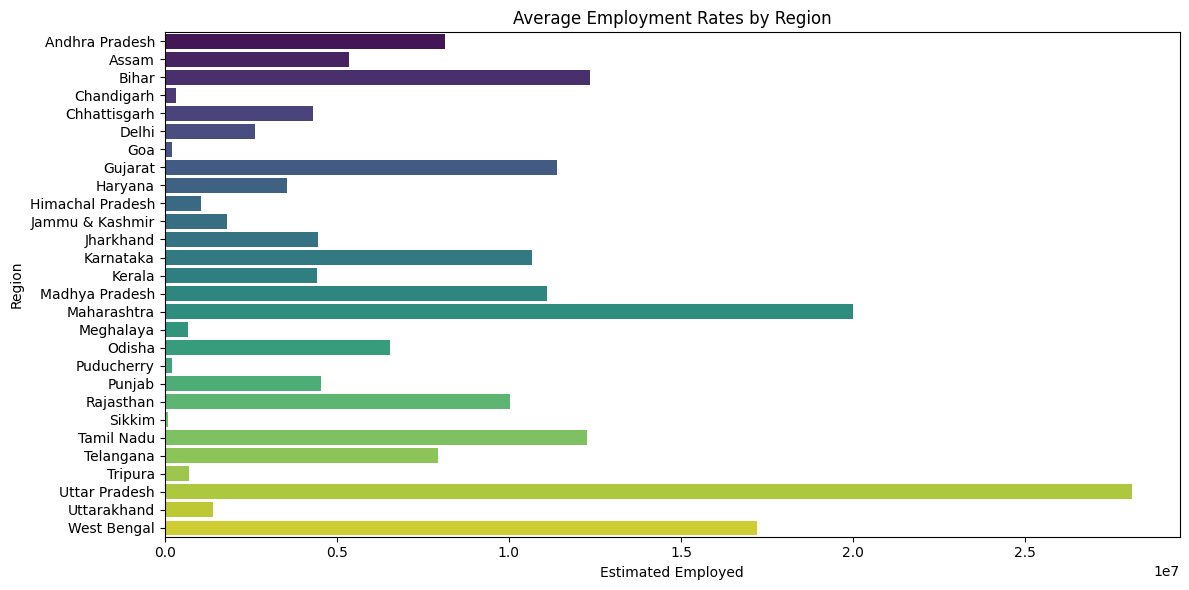

In [35]:
# Calculate average employment by region
avg_employment = df.groupby('Region')['Estimated Employed'].mean().reset_index()

# Visualize average employment by region
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_employment, x='Estimated Employed', y='Region', palette='viridis')
plt.title('Average Employment Rates by Region')
plt.xlabel('Estimated Employed')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

In [36]:
# Summary of Unemployment Rate by Region during COVID-19
covid_unemployment_summary = covid_period.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
print(covid_unemployment_summary)


Region
Puducherry          38.955000
Jharkhand           36.348750
Haryana             34.652500
Bihar               31.631250
Tripura             26.702500
Tamil Nadu          25.403750
Delhi               22.157500
Kerala              17.952500
Uttar Pradesh       17.382500
Rajasthan           17.311250
Himachal Pradesh    17.068750
Telangana           15.442500
Karnataka           15.280000
Punjab              14.622500
Chandigarh          14.325000
Madhya Pradesh      14.070000
Andhra Pradesh      13.576250
Goa                 13.107500
Chhattisgarh        13.075000
Maharashtra         13.026250
Jammu & Kashmir     12.888000
West Bengal         12.011250
Odisha              11.281250
Gujarat             10.383750
Sikkim               9.068333
Uttarakhand          8.815714
Meghalaya            7.072857
Assam                6.578571
Name: Estimated Unemployment Rate (%), dtype: float64
